# Lab 3 – Cifrados Simétricos
### Javier Mombiela
### Carnet: 20067

## Problema 1

In [93]:
from cifrados.block import *

from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [94]:
# Funcion para mostrar imagenes
def show_image(image_path):
    try:
        img = Image.open(image_path)

        plt.imshow(img)
        plt.axis('off') 
        plt.show()
    except Exception as e:
        print(f"Hubo un error al desplegar la imagen: {e}")

### 1.1 Mr. Increible 

In [95]:
with open('./keys/mr-increible.key', 'r') as f:
    increibleKey = f.read()

increibleImg = './images/mr-increible_encrypted_image.jpeg'
increible_decrypted = './images/mr-increible_decrypted_image.jpeg'

print("Imagen encriptada con ECB:")
show_image(increibleImg)


Imagen encriptada con ECB:
Hubo un error al desplegar la imagen: cannot identify image file './images/mr-increible_encrypted_image.jpeg'


ECB


Imagen desencriptada con ECB:


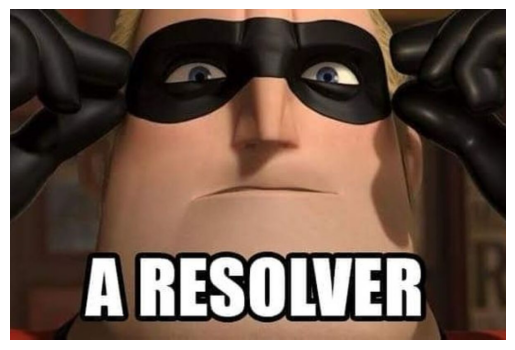

In [96]:
try:
    ecb_decrypt(increibleImg, increible_decrypted, increibleKey)

    print("\nImagen desencriptada con ECB:")
    show_image(increible_decrypted)
except Exception as e:
    print(f"Hubo un error al desencriptar la imagen: {e}")

CBC

In [97]:
try:
    cbc_decrypt(increibleImg, increible_decrypted, increibleKey)

    print("\nImagen desencriptada con ECB:")
    show_image(increible_decrypted)
except Exception as e:
    print(f"Hubo un error al desencriptar la imagen: {e}")

Hubo un error al desencriptar la imagen: Padding is incorrect.


### 1.2 Ayno

In [98]:
with open('./keys/ayno.key', 'r') as f:
    increibleKey = f.read()

aynoImg = './images/ayno_encrypted_image.jpeg'
ayno_decrypted = './images/ayno_decrypted_image.jpeg'

print("Imagen encriptada con CBC:")
show_image(aynoImg)

Imagen encriptada con CBC:
Hubo un error al desplegar la imagen: cannot identify image file './images/ayno_encrypted_image.jpeg'


ECB

In [99]:
try:
    ecb_decrypt(aynoImg, ayno_decrypted, increibleKey)

    print("\nImagen desencriptada con CBC:")
    show_image(ayno_decrypted)
except Exception as e:
    print(f"Hubo un error al desencriptar la imagen: {e}")

Hubo un error al desencriptar la imagen: Padding is incorrect.


CBC

In [100]:
try:
    cbc_decrypt(aynoImg, ayno_decrypted, increibleKey)

    print("\nImagen desencriptada con CBC:")
    show_image(ayno_decrypted)
except Exception as e:
    print(f"Hubo un error al desencriptar la imagen: {e}")


Imagen desencriptada con CBC:
Hubo un error al desplegar la imagen: cannot identify image file './images/ayno_decrypted_image.jpeg'


### 1.3 Diferencias entre ECB y CBC

**Introducción**

El cifrado por bloques es una tecnica que se utiliza en la criptografía moderna. En esta tecnica, los datos se dividen en bloques de tamaño fijo y cada bloque se cifra o descifra de manera independiente. Entre los diferentes modos de cifrado por bloques, Electronic Codebook (ECB) y Cipher Block Chaining (CBC) son dos de los más comunes y ampliamente utilizados en aplicaciones de seguridad de la información.

**EBC**

El modo ECB es uno de los modos de cifrado más simples. Este modo divide en bloques fijos de tamaño y cifra cada bloque de manera independiente. Cada bloque cifrado es idéntico si los mismos datos se cifran más de una vez. Por lo mismo, este modo es vulnerable a ataques, ya que la repetición de bloques puede revelar información sobre la estructura de los datos originales.

**CBC**

Por otro lado, en el modo CBC, cada bloque de texto plano se combina con el bloque cifrado anterior antes de cifrarse. Se introduce un vector de inicialización (IV) aleatorio para el primer bloque. La cadena de bloques cifrados depende de la salida del bloque anterior, lo que introduce dependencia en la secuencia de cifrado.

Por lo tanto, CBC proporciona confidencialidad, ya que la salida de cada bloque depende de los bloques anteriores. No revela patrones de repetición en los datos cifrados y ofrece cierta integridad de los datos, ya que la modificación de un bloque afecta a los bloques siguientes. 

**Diferencias**

ECB y CBC son dos modos de cifrado con características distintivas. ECB es más rápido y fácil de implementar, pero menos seguro debido a su susceptibilidad a ciertos ataques. Por otro lado, CBC proporciona una mayor seguridad al introducir dependencia entre bloques, pero puede ser más lento y complejo de implementar. 

### 1.4 ¿Fue posible descifrar las 2 imágenes?

Para la parte uno de este laboratorio se tuvo que encontrar dos iamgenes y sus claves correspondientes al ingresar al servidor Uwu-guate.site. Las dos imagenes que se encontraron fueron *mr-increible-encrypted-image.jpeg* y *ayno-encrypted-image.jpeg*.

Las instrucciones de la parte uno del laboratorio era que poder descifrar ambas imagenes con el algoritmo AES, la de mr. increible con modo ECB y la de ayno con modo CBC. 

Al implementar la función de descifrado con modo ECB con la imagen de Mr. Increbile, si fue posible descifrar dicha imagen. Por el otro lado, cuando se intento descifrar la imagen de Ayno con el modo CBC, no fue posible descifrar la imagen. Una de las razones para esto, es que no teniamos el vector de inicialización con el que se encripto la imagen, por lo cual no fue posible la desencriptada de esta. 

## Problema 2

Imagen de Tux Original

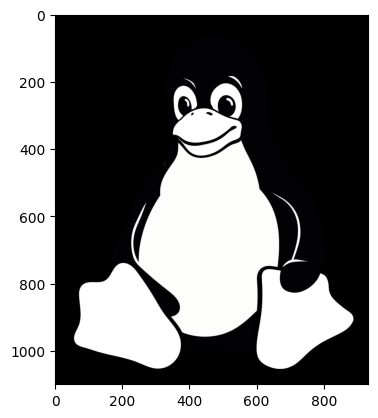

In [101]:
tuxOriginal = './images/tux.ppm'

img = mpimg.imread(tuxOriginal)
plt.imshow(img)
plt.show()

### 2.1 Tux Encriptado con OpenSSL ECB

Comando para obtener clave:
- `openssl rand -hex 16`
- clave generada: 800455671575d71a7515da8e7c225b3a

Comando para encriptar el cuerpo con ECB:
- `openssl enc -aes-128-ecb -nosalt -in images/tuxBody.ppm -out images/tuxOpenSSlECB.ppm -K 800455671575d71a7515da8e7c225b3a`

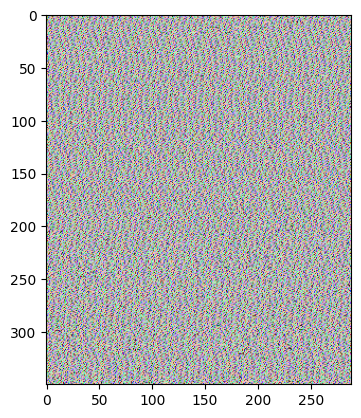

In [102]:
tuxOpenSSlECB = './images/tuxOpenSSlECB.ppm'

img = mpimg.imread(tuxOpenSSlECB)
plt.imshow(img)
plt.show()

### 2.2 Tux Encriptado con OpenSSL CBC

Comando para obtener clave:
- `openssl rand -hex 16`
- Clave obtenida: 5f1d125b8ed99cef22dd734a54f4e0f4

Comando para obtener IV: 8f2322166970687128b546c499a040e5
- `openssl rand -hex 16`
- IV obtenido: 

Comando para encriptar el cuerpo con CBC:
- `openssl enc -aes-128-cbc -nosalt -in images/tuxBody.ppm -out images/tuxOpenSSlCBC.ppm -K 5f1d125b8ed99cef22dd734a54f4e0f4 -iv 8f2322166970687128b546c499a040e5`

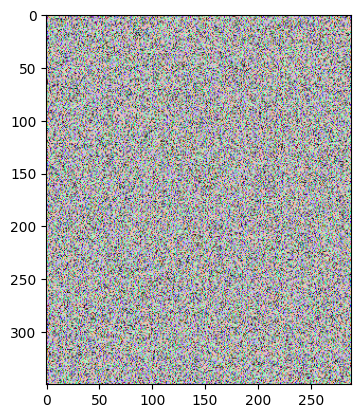

In [103]:
tuxOpenSSlCBC = './images/tuxOpenSSlCBC.ppm'

img = mpimg.imread(tuxOpenSSlCBC)
plt.imshow(img)
plt.show()

### 2.3 Explicación de lo que se ve en cada imagen

Después de realizar en encripatado con OpenSSL, resultamos con dos cuerpos resultantes de la imagen de *Tux.ppm*, una en donde el cuerpo esta encriptado utilizando ECB y la otra en donde el cuerpo esta encriptado utilizando CBC. Al agregarle el header a las imagenes, fui capaz de visualizar las imagenes utilizando matplotlib. 

A la hora de visualizar la imagen ecriptada con ECB, podemos ver que ya no es posible ver a Tux, debido a todo el ruido que se agrego a la hora de encriptar el cuerpo. Lo que podemos observar, es que hay un patron en el ruido, ya que la cantidad de ruido agregado no fue mucho.

Por otro lado, a la hora de visualizar la imagen encriptada con CBc, podemos ver que tampoco es posible ver a Tux por el ruido que se agrego. Pero podemos ver que si hay una diferencia entre este ruido con el que vimos con el encriptado ECB. En esta imagen, podemos ver que la cantidad de ruido es mucho mayor y que solamente no podemos identificar ningun patron ni nada por el estilo en la imagen, ya que este encriptado es mas complejo y seguro, por lo cual la cantidad de ruido es mayor, distorcionando la imagen original aun mas. 